In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
%matplotlib inline

In [3]:
datasetB = pd.read_csv('tweets-total-csv-3-class-balanced.csv', encoding='ISO-8859-1', delimiter=';')
dataset = pd.read_csv('tweets-total-csv-3-class-unbalanced.csv', encoding='ISO-8859-1', delimiter=';')

In [4]:
tweets = dataset['tweet'].values
classes = dataset['OPINIAO'].values
tweetsB = datasetB['tweet'].values
classesB = datasetB['OPINIAO'].values

In [5]:
def Preprocessamento(instancia):
    #remove links, pontos, virgulas,ponto e virgulas dos tweets
    #coloca tudo em minusculo
    fraseslimpas = []
    for palavras in instancia:
        palavras = re.sub(r"http\S+", "", palavras).lower().replace(',','').replace('.','').replace(';','').replace('-','').replace(':','').replace('?','')
        fraseslimpas.append(palavras)
    return (fraseslimpas)

In [6]:
def RemoveStopWords(instancia):
    #remove stopwords
    fraseslimpas = []
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.remove('não')
    for palavras in instancia:
        semstop = [p for p in palavras.split() if p not in stopwords]
        fraseslimpas.append((str(semstop)))
    return (fraseslimpas)

In [7]:
def SteamingSemStopWords(instancia):
    fraseslimpas = []
    stemmer = nltk.stem.RSLPStemmer()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    stopwords.remove('não')
    for palavras in instancia:
        semstop = [str(stemmer.stem(p)) for p in palavras.split() if p not in stopwords]
        fraseslimpas.append((str(semstop)))
    return (fraseslimpas)

In [8]:
tweetsprocessados = Preprocessamento(dataset['tweet'].values)
tweetsSteaming = SteamingSemStopWords(tweetsprocessados)
tweets = RemoveStopWords(tweetsprocessados)

In [9]:
tweetsprocessados = Preprocessamento(datasetB['tweet'].values)
tweetsSteamingB = SteamingSemStopWords(tweetsprocessados)
tweetsB = RemoveStopWords(tweetsprocessados)

In [10]:
print(tweetsprocessados[1])
print(tweetsSteaming[1])
print(tweets[1])

o #bancodobrasil já me deixou uma mensagem de parabéns o 1º
['#bancodobrasil', 'deix', 'mens', 'parabém', '1º']
['#bancodobrasil', 'deixou', 'mensagem', 'parabéns', '1º']


In [11]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweetsSB = vectorizer.fit_transform(tweetsSteamingB)
freq_tweetsS = vectorizer.fit_transform(tweetsSteaming)
freq_tweetsB = vectorizer.fit_transform(tweetsB)
freq_tweets = vectorizer.fit_transform(tweets)

modeloSteamingB = MultinomialNB()
modeloSteaming = MultinomialNB()
modeloB = MultinomialNB()
modelo = MultinomialNB()

modeloSteamingB.fit(freq_tweetsSB, classesB)
modeloSteaming.fit(freq_tweetsS, classes)
modeloB.fit(freq_tweetsB, classesB)
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:

print(freq_tweetsB.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
resultadoSteamingB = cross_val_predict(modeloSteamingB, freq_tweetsSB, classesB, cv=100)
resultadoSteaming = cross_val_predict(modeloSteaming, freq_tweetsS, classes, cv=100)
resultadoB = cross_val_predict(modeloB, freq_tweetsB, classesB, cv=100)
resultado = cross_val_predict(modelo, freq_tweets, classes, cv=100)
print('Balanceado')
print('Porcentagem de acerto Steaming: %f ' % (metrics.accuracy_score(classesB, resultadoSteamingB)*100))
print('Porcentagem de acerto normal: %f ' % (metrics.accuracy_score(classesB, resultadoB)*100))
print('Desbalanceado')
print('Porcentagem de acerto Steaming: %f ' % (metrics.accuracy_score(classes, resultadoSteaming)*100))
print('Porcentagem de acerto normal: %f ' % (metrics.accuracy_score(classes, resultado)*100))

Balanceado
Porcentagem de acerto Steaming: 76.907631 
Porcentagem de acerto normal: 77.510040 
Desbalanceado
Porcentagem de acerto Steaming: 73.339941 
Porcentagem de acerto normal: 73.587711 


In [14]:
print('Steaming Balanceado')
opiniao=['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classesB,resultadoSteamingB,opiniao))
print('Steaming Desbalanceado')
print(metrics.classification_report(classes,resultadoSteaming,opiniao))
print('Normal Balanceado')
print(metrics.classification_report(classesB,resultadoB,opiniao))
print('Normal Desbalanceado')
print(metrics.classification_report(classes,resultado,opiniao))

Steaming Balanceado
              precision    recall  f1-score   support

    Positivo       0.68      0.67      0.67       166
    Negativo       0.92      0.98      0.95       166
      Neutro       0.70      0.66      0.68       166

   micro avg       0.77      0.77      0.77       498
   macro avg       0.76      0.77      0.77       498
weighted avg       0.76      0.77      0.77       498

Steaming Desbalanceado
              precision    recall  f1-score   support

    Positivo       0.31      0.22      0.26       166
    Negativo       0.78      0.93      0.84      1299
      Neutro       0.69      0.43      0.53       553

   micro avg       0.73      0.73      0.73      2018
   macro avg       0.59      0.53      0.54      2018
weighted avg       0.71      0.73      0.71      2018

Normal Balanceado
              precision    recall  f1-score   support

    Positivo       0.69      0.66      0.67       166
    Negativo       0.93      0.98      0.96       166
      Neutro  

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


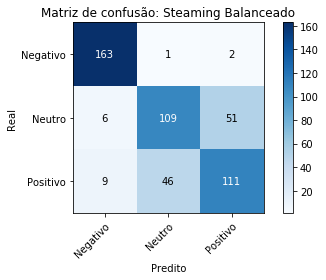

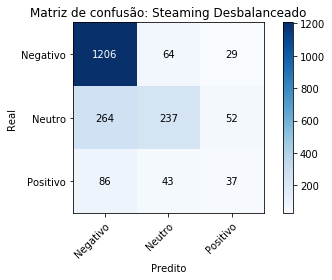

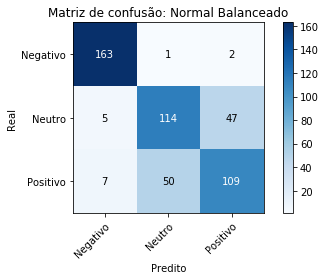

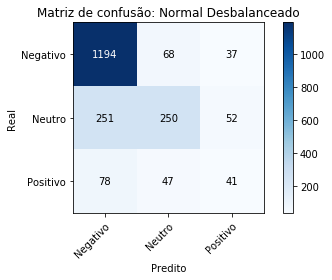

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data 
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Real',
           xlabel='Predito')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(classesB, resultadoSteamingB, classes=opiniao,
                      title='Matriz de confusão: Steaming Balanceado')

# Plot normalized confusion matrix
plot_confusion_matrix(classes, resultadoSteaming, classes=opiniao,
                      title='Matriz de confusão: Steaming Desbalanceado')

plot_confusion_matrix(classesB, resultadoB, classes=opiniao,
                      title='Matriz de confusão: Normal Balanceado')

plot_confusion_matrix(classes, resultado, classes=opiniao,
                      title='Matriz de confusão: Normal Desbalanceado')

plt.show()

In [16]:
def BuscaOpiniao(frase):
    tweetsprocessados = Preprocessamento(frase)
    tweets = RemoveStopWords(tweetsprocessados)
    vectorizer.fit_transform(tweetsB)
    freq_tweets = vectorizer.transform(tweets)
    opniao = modeloB.predict(freq_tweets)
    prob = modeloB.predict_proba(freq_tweets).max()
    return opniao,prob

In [17]:
datasetTest = pd.read_csv('DadosTest.csv', encoding='ISO-8859-1', delimiter=';')
datasetClassificado = pd.DataFrame(columns=['Text','Opiniao','Probabilidade'])

In [18]:
for text in datasetTest['Text']:
    global opiniao
    opiniao = BuscaOpiniao([text])
    datasetClassificado = datasetClassificado.append({'Text':text,'Opiniao':opiniao[0][0],'Probabilidade':opiniao[1]}, ignore_index=True)

In [19]:
datasetClassificado.to_excel('DadosClassificadosTest.xlsx')

In [20]:
def BuscaProbabilidade(frase):
    tweetsprocessados = Preprocessamento(frase)
    print(tweetsprocessados)
    tweets = RemoveStopWords(tweetsprocessados)
    vectorizer.fit_transform(tweetsB)
    freq_tweets = vectorizer.transform(tweets)
    opniao = modeloB.predict(freq_tweets)
    print(opniao)
    prob = modeloB.predict_proba(freq_tweets)
    print(modeloB.classes_)
    print(prob)

In [25]:
BuscaProbabilidade([datasetTest['Text'][0]])

['folha de são paulo não tem credibilidade com a maioria do povo brasileiro meu senador por muitas vezes se portar contra o brasil não perca o seu prestígio postando coisas que venham da folha tenha um bom dia senador']
['Neutro']
['Negativo' 'Neutro' 'Positivo']
[[0.09 0.71 0.19]]


In [22]:
datasetTest['Text']

0    Folha de São Paulo não tem credibilidade com a...
1    Kkkkk apoio total a Moro!!!!!! Folha de São Pa...
2    FALHA DE SÃO PAULO ATACANDO O INATACÁVEL! QUE ...
Name: Text, dtype: object